In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import pickle
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score

In [2]:
data_path=Path("../Data/FeatureEngineering/feature_engineered_data.csv")
df = pd.read_csv(data_path)
with open('../Data/FeatureEngineering/feature_engineering_metadata.pkl', 'rb') as f:
    loaded_metadata = pickle.load(f)
print(loaded_metadata)

{'class_labels': {'Apple': np.int64(0), 'Banana': np.int64(1), 'Burger': np.int64(2), 'Donut': np.int64(3), 'Ice Cream': np.int64(4), 'Pasta': np.int64(5), 'Pizza': np.int64(6), 'Salad': np.int64(7), 'Steak': np.int64(8), 'Sushi': np.int64(9)}, 'classes': ['Apple', 'Banana', 'Burger', 'Donut', 'Ice Cream', 'Pasta', 'Pizza', 'Salad', 'Steak', 'Sushi'], 'selected_features': ['Calories', 'Protein', 'Fat', 'Carbs', 'Sugar', 'Fiber', 'Sodium', 'Cholesterol', 'Glycemic_Index', 'Water_Content', 'Serving_Size', 'Is_Vegan', 'Is_Gluten_Free', 'Meal_breakfast', 'Meal_dinner', 'Meal_lunch', 'Meal_snack', 'Prep_baked', 'Prep_fried', 'Prep_grilled', 'Prep_raw'], 'trained_scaler': StandardScaler(), 'label_encoder': LabelEncoder()}


Train Accuracy: 0.9947
Test Accuracy: 0.9924
Precision (Weighted): 0.9924
Recall (Weighted): 0.9924
F1-score (Weighted): 0.9924

Classification Report:
               precision    recall  f1-score   support

       Apple       0.98      0.98      0.98       311
      Banana       0.97      0.98      0.98       222
      Burger       0.99      0.98      0.98       969
       Donut       1.00      1.00      1.00       929
   Ice Cream       1.00      1.00      1.00       606
       Pasta       1.00      1.00      1.00       825
       Pizza       0.98      0.99      0.98      1153
       Salad       1.00      1.00      1.00       199
       Steak       1.00      1.00      1.00       393
       Sushi       1.00      1.00      1.00       671

    accuracy                           0.99      6278
   macro avg       0.99      0.99      0.99      6278
weighted avg       0.99      0.99      0.99      6278

Scores for each fold: [0.99283154 0.99223417 0.99183592 0.99263242 0.99203346]
Average A

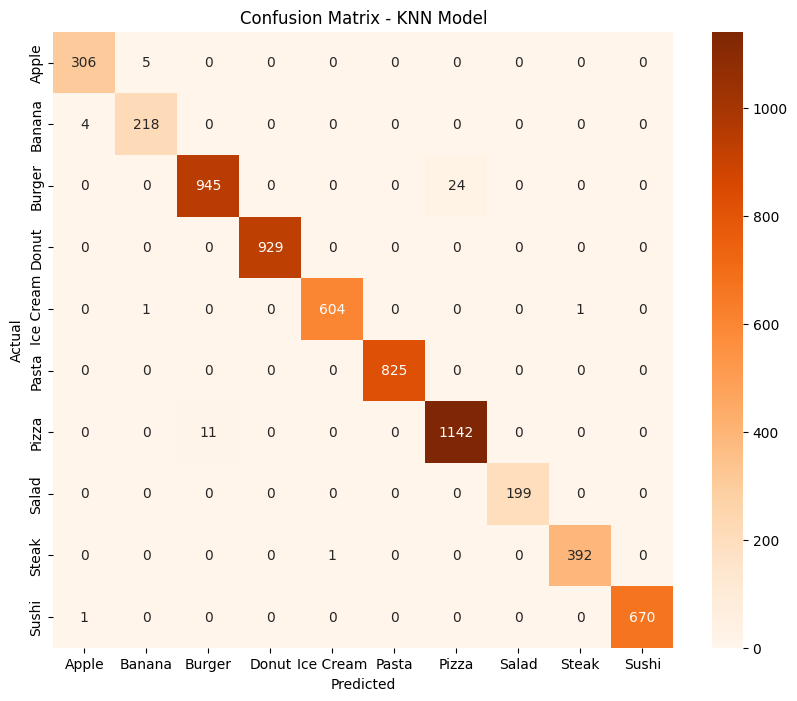

In [3]:
target_col = 'Food_Name_Encoded'
X = df.drop(columns=[target_col])
y = df[target_col]

# 3. Split the data into Training and Testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Initialize and train the KNN Model
# Using k=5 neighbors
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# 5. Make Predictions
y_pred = knn_model.predict(X_test)
y_train_pred = knn_model.predict(X_train)

# 6. Evaluation Metrics
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

target_names = loaded_metadata['classes']
class_report = classification_report(y_test, y_pred, target_names=target_names)

print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Precision (Weighted): {precision:.4f}")
print(f"Recall (Weighted): {recall:.4f}")
print(f"F1-score (Weighted): {f1:.4f}")
print("\nClassification Report:\n", class_report)
scores = cross_val_score(knn_model, X_train, y_train, cv=5, scoring='accuracy')

print(f"Scores for each fold: {scores}")
print(f"Average Accuracy: {scores.mean():.4f}")
print(f"Standard Deviation: {scores.std():.4f}")

# 7. Visualize Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Oranges', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - KNN Model')

results = {
    "test_accuracy": test_accuracy,
    "train_accuracy": train_accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1-score": f1,
    "classification_report": class_report,
    "cross_val_scores": scores,
    "cross_val_mean": scores.mean(),
    "cross_val_std": scores.std(),
    "confusion_matrix": conf_matrix
}
print(results)

In [4]:
KNN_model={
    'model':knn_model,
    "results": results
}
with open('../Models/knn_model.pkl', 'wb') as f:
    pickle.dump(KNN_model, f)

In [5]:
import sys
import os

parent_dir = os.path.abspath(os.path.join(os.getcwd(), ".."))
if parent_dir not in sys.path:
    sys.path.append(parent_dir)
    
from predict import predict_food
predict_food(knn_model,{'Calories': 200, 'Protein': 0, 'Fat': 0, 'Carbs': 30, 'Sugar': 500, 'Fiber': 0, 'Sodium': 0,'Cholesterol': 0,'Glycemic_Index': 0,'Water_Content': 60, 'Serving_Size': 50,'Is_Vegan': 0,'Is_Gluten_Free': 0,'Meal_breakfast': 0,'Meal_dinner': 0,'Meal_lunch': 0,'Meal_snack': 1,'Prep_baked': 0,'Prep_fried': 0,'Prep_grilled': 0,'Prep_raw': 1})
test=pd.DataFrame([{'Calories': 200, 'Protein': 0, 'Fat': 0, 'Carbs': 30, 'Sugar': 500, 'Fiber': 0, 'Sodium': 0,'Cholesterol': 0,'Glycemic_Index': 0,'Water_Content': 60, 'Serving_Size': 50,'Is_Vegan': 0,'Is_Gluten_Free': 0,'Meal_breakfast': 0,'Meal_dinner': 0,'Meal_lunch': 0,'Meal_snack': 1,'Prep_baked': 0,'Prep_fried': 0,'Prep_grilled': 1,'Prep_raw': 0}])

{'model': LogisticRegression(max_iter=1000, random_state=42)}
   Calories   Protein       Fat    Carbs     Sugar     Fiber    Sodium  \
0 -0.789107 -1.479211 -1.861875  0.09932  3.415151 -1.372714 -1.167916   

   Cholesterol  Glycemic_Index  Water_Content  ...  Is_Vegan  Is_Gluten_Free  \
0    -1.460341       -2.068807       1.063572  ...         0               0   

   Meal_breakfast  Meal_dinner  Meal_lunch  Meal_snack  Prep_baked  \
0               0            0           0           1           0   

   Prep_fried  Prep_grilled  Prep_raw  
0           0             0         1  

[1 rows x 21 columns]


In [6]:
prediction=knn_model.predict(test)
print("prediction result:",prediction[0])
# 1. Get the probabilities
probs = knn_model.predict_proba(test)[0]
food_names = ["Apple", "Banana", "Burger", "Donut", "Ice Cream", "Pasta", "Pizza", "Salad", "Steak", "Sushi"]

result_list = [
    {"label": food_names[i], "probability": round(float(probs[i]), 4)} 
    for i in range(len(probs))
]

test = [
    {"label": label, "probability": round(float(prob), 4)} 
    for label, prob in zip(knn_model.classes_, probs)
]

# 3. Sort by probability
result_list = sorted(result_list, key=lambda x: x['probability'], reverse=True)

print(result_list)
print(test)

prediction result: 6
[{'label': 'Pizza', 'probability': 0.4}, {'label': 'Burger', 'probability': 0.2}, {'label': 'Donut', 'probability': 0.2}, {'label': 'Sushi', 'probability': 0.2}, {'label': 'Apple', 'probability': 0.0}, {'label': 'Banana', 'probability': 0.0}, {'label': 'Ice Cream', 'probability': 0.0}, {'label': 'Pasta', 'probability': 0.0}, {'label': 'Salad', 'probability': 0.0}, {'label': 'Steak', 'probability': 0.0}]
[{'label': np.int64(0), 'probability': 0.0}, {'label': np.int64(1), 'probability': 0.0}, {'label': np.int64(2), 'probability': 0.2}, {'label': np.int64(3), 'probability': 0.2}, {'label': np.int64(4), 'probability': 0.0}, {'label': np.int64(5), 'probability': 0.0}, {'label': np.int64(6), 'probability': 0.4}, {'label': np.int64(7), 'probability': 0.0}, {'label': np.int64(8), 'probability': 0.0}, {'label': np.int64(9), 'probability': 0.2}]
